In [1]:
import numpy as np
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

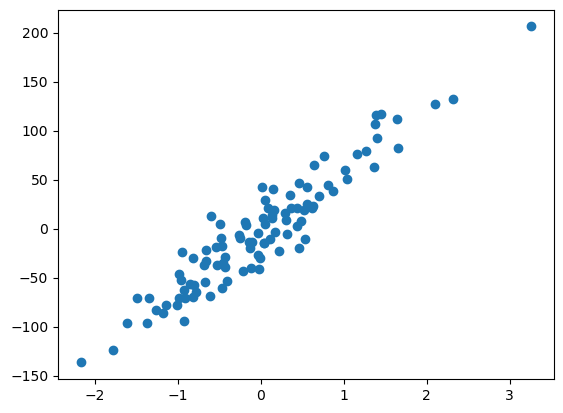

In [3]:
plt.scatter(x,y)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

print(lr.coef_)
print(lr.intercept_)

[61.32877637]
-2.0814521980838467


In [6]:
x_test.shape

(20, 1)

In [7]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.8884420428297317

In [18]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x,y):
        #calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b) * x.ravel())
    
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)            
        print(self.b,self.m)
        
    def predict(self,x):
        return self.m * x + self.b

In [19]:
gd = GDRegressor(0.001,50)

In [20]:
gd.fit(x_train,y_train)

-2.0995847850408578 61.333728850358334


In [21]:
y_pred = gd.predict(x_test)

In [22]:
r2_score(y_test,y_pred)

0.8885349111237265